In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(784, 15)

In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
#deck to drop krna hi pdega koi mtlb nhi h itne null value ka and also jab sex h to who, adult_male nhi chhaiye h , 
# also embarked and embark_town do baar h , similarly alive-survived , class-pclass so clean them too
df.drop(columns=['deck','who','adult_male','class','alive','embark_town'], inplace=True)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
5,0,3,male,NaN,0,0,8.4583,Q,True
6,0,1,male,54.0,0,0,51.8625,S,True
7,0,3,male,2.0,3,1,21.0750,S,False
8,1,3,female,27.0,0,2,11.1333,S,False
9,1,2,female,14.0,1,0,30.0708,C,False


In [12]:
 #But age and embark m h abhibhi missing values so usko bhr dete hai 
df['age'].fillna(df['age'].mean(), inplace=True)
df['age'].isnull().sum()

0

In [13]:
# 2 hi row h embarked ke jisme problem h to use bhi hata hi dete h ab 
df.dropna(subset=['embarked'],inplace=True)
df['embarked'].isna().sum()

0

# Label Encoding

In [14]:
#kis kisko kre? 
df.info()
#isko dekhke to sex and embarked to pakka hi h 

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  782 non-null    int64  
 1   pclass    782 non-null    int64  
 2   sex       782 non-null    object 
 3   age       782 non-null    float64
 4   sibsp     782 non-null    int64  
 5   parch     782 non-null    int64  
 6   fare      782 non-null    float64
 7   embarked  782 non-null    object 
 8   alone     782 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex','embarked']
label_encoder = {}
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col]=le

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,2,True
3,1,1,0,35.0,1,0,53.1000,2,False
4,0,3,1,35.0,0,0,8.0500,2,True


In [16]:
df = df.astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


<Axes: >

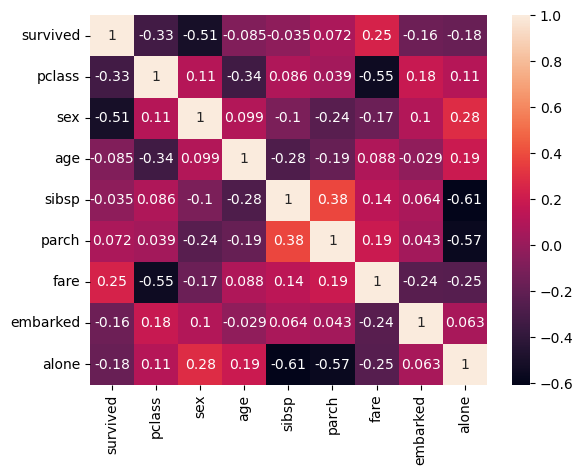

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='sibsp', ylabel='survived'>

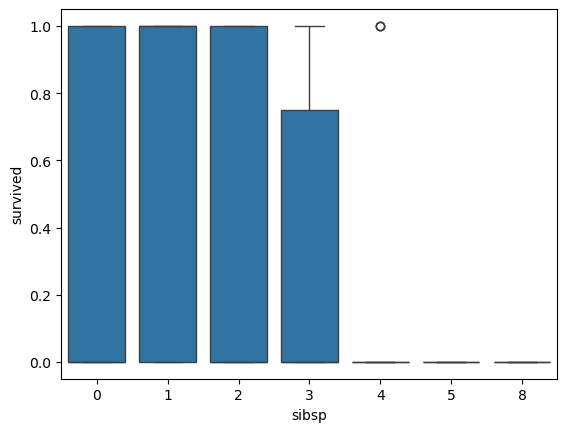

In [18]:
sns.boxplot(data=df, x='sibsp', y='survived')

<Axes: xlabel='age', ylabel='survived'>

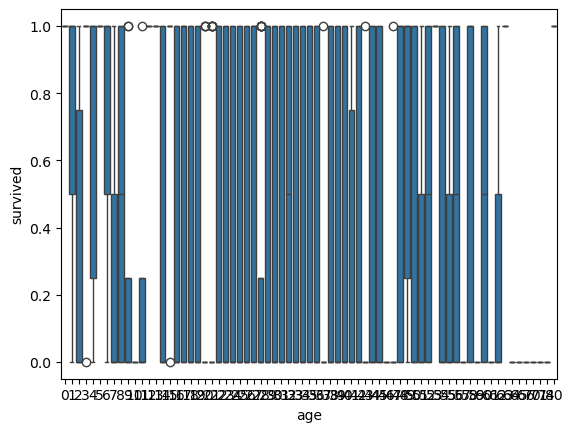

In [19]:
sns.boxplot(data=df, x='age', y='survived')

In [20]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
df_copy = df.copy()

In [21]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [22]:
df_copy = obj.fit_transform(df_copy)

In [23]:
df_copy.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [40]:
df_copy = pd.DataFrame(df_copy, columns=df.columns)
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,-0.834453,0.882705,0.769849,-0.561138,0.482210,-0.49795,-0.521113,0.587257,-1.146128
1,1.198389,-1.461185,-1.298955,0.607463,0.482210,-0.49795,0.706039,-1.901823,-1.146128
2,1.198389,0.882705,-1.298955,-0.268987,-0.531468,-0.49795,-0.521113,0.587257,0.872503
3,1.198389,-1.461185,-1.298955,0.388351,0.482210,-0.49795,0.360903,0.587257,-1.146128
4,-0.834453,0.882705,0.769849,0.388351,-0.531468,-0.49795,-0.501939,0.587257,0.872503


# Logistic Regression Model

In [24]:
X = df.drop('survived', axis=1)
y = df['survived']
X

,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,3,1,22,1,0,7,2,0
1,1,0,38,1,0,71,0,0
2,3,0,26,0,0,7,2,1
3,1,0,35,1,0,53,2,0
4,3,1,35,0,0,8,2,1
...,...,...,...,...,...,...,...,...
885,3,0,39,0,5,29,1,0
887,1,0,19,0,0,30,2,1
888,3,0,29,1,2,23,2,0
889,1,1,26,0,0,30,0,1


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1])

In [29]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score

In [30]:
print('accuracy_score :', accuracy_score(y_test,y_pred) )

accuracy_score : 0.7579617834394905


In [33]:
print('f1_score :', f1_score(y_test,y_pred) )

f1_score : 0.7205882352941176


In [34]:
print('f1_score :', recall_score(y_test,y_pred) )

f1_score : 0.7101449275362319


In [35]:
print('f1_score :', precision_score(y_test,y_pred) )

f1_score : 0.7313432835820896


In [42]:
X_copy = df_copy.drop('survived', axis=1)
Y_copy = df['survived']
X_copy

,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0.882705,0.769849,-0.561138,0.482210,-0.497950,-0.521113,0.587257,-1.146128
1,-1.461185,-1.298955,0.607463,0.482210,-0.497950,0.706039,-1.901823,-1.146128
2,0.882705,-1.298955,-0.268987,-0.531468,-0.497950,-0.521113,0.587257,0.872503
3,-1.461185,-1.298955,0.388351,0.482210,-0.497950,0.360903,0.587257,-1.146128
4,0.882705,0.769849,0.388351,-0.531468,-0.497950,-0.501939,0.587257,0.872503
...,...,...,...,...,...,...,...,...
777,0.882705,-1.298955,0.680501,-0.531468,5.474391,-0.099280,-0.657283,-1.146128
778,-1.461185,-1.298955,-0.780250,-0.531468,-0.497950,-0.080105,0.587257,0.872503
779,0.882705,-1.298955,-0.049875,0.482210,1.890987,-0.214325,0.587257,-1.146128
780,-1.461185,0.769849,-0.268987,-0.531468,-0.497950,-0.080105,-1.901823,0.872503


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_copy, Y_copy,test_size=0.20, random_state=45)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print('Confusion_matrix : ', confusion_matrix(y_test, y_pred) )

Confusion_matrix :  [[84 12]
 [19 42]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84        96
           1       0.78      0.69      0.73        61

    accuracy                           0.80       157
   macro avg       0.80      0.78      0.79       157
weighted avg       0.80      0.80      0.80       157



In [50]:
print(f1_score(y_test, y_pred))
print(recall_score(y_test,y_pred))

0.7304347826086957
0.6885245901639344


<Axes: xlabel='survived', ylabel='count'>

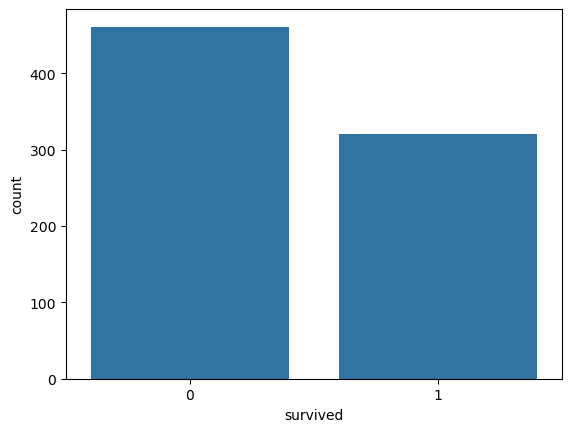

In [39]:
sns.countplot(x = df['survived'])

## The F1 score is generally the best starting point for the Titanic dataset.
***Why***: The data is slightly imbalanced (more people died than survived, as seen in your countplot).<br /> 
Accuracy can be misleading here. The F1 score provides a balanced measure of both precision and recall, offering a robust single metric for overall model performance on the positive class ('survived').
<br /> <br />
## Prioritize Recall (If Missing Survivors is Costly)
You would prioritize Recall if minimizing the number of people you fail to predict as survivors (false negatives) is the absolute highest priority. <br />
***Why***: Recall measures the proportion of actual survivors that your model correctly identified. If a low recall score is unacceptable, this is your key metric.


# So for this project I can say is none of the way for Logistic Regression did i get the score >80 for f1 and recall as it's best up here
# Hence let's try others model to check

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_with_5k_model = KNeighborsClassifier(n_neighbors= 5)
knn_with_5k_model.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn_with_5k_model.predict(X_test)

In [56]:
print('f1_score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))

f1_score :  0.6440677966101694
recall :  0.6229508196721312
accuracy :  0.732484076433121


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        96
           1       0.67      0.62      0.64        61

    accuracy                           0.73       157
   macro avg       0.72      0.71      0.71       157
weighted avg       0.73      0.73      0.73       157



In [57]:
confusion_matrix(y_test, y_pred)

array([[77, 19],
       [23, 38]])

# Naive Bayes

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state=42)
from sklearn.naive_bayes import GaussianNB
model_nv = GaussianNB()

In [59]:
model_nv.fit(X_train,y_train)

GaussianNB()

In [60]:
y_pred = model_nv.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

array([[68, 20],
       [20, 49]])

In [62]:
print('f1_score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))

f1_score :  0.7101449275362319
recall :  0.7101449275362319
accuracy :  0.7452229299363057


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        88
           1       0.71      0.71      0.71        69

    accuracy                           0.75       157
   macro avg       0.74      0.74      0.74       157
weighted avg       0.75      0.75      0.75       157



# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state=42)
model_DT = DecisionTreeClassifier(random_state=42)

In [66]:
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred = model_DT.predict(X_test)

In [68]:
confusion_matrix(y_test, y_pred)

array([[79,  9],
       [24, 45]])

In [69]:
print('f1_score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

f1_score :  0.7317073170731707
recall :  0.6521739130434783
accuracy :  0.7898089171974523
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        88
           1       0.83      0.65      0.73        69

    accuracy                           0.79       157
   macro avg       0.80      0.77      0.78       157
weighted avg       0.80      0.79      0.79       157



# SVM

In [81]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X_copy, y , test_size=0.20, random_state=42)

In [82]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

SVC()

In [83]:
y_pred = model_svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[78, 10],
       [24, 45]])

In [84]:
print('f1_score : ', f1_score(y_test,y_pred))
print('recall : ', recall_score(y_test,y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

f1_score :  0.7258064516129032
recall :  0.6521739130434783
accuracy :  0.7834394904458599
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        88
           1       0.82      0.65      0.73        69

    accuracy                           0.78       157
   macro avg       0.79      0.77      0.77       157
weighted avg       0.79      0.78      0.78       157



# WE WILL BE CHOOSING SVM MODEL FOR THIS DATASET